In [1]:
import pandas as pd
import numpy as np
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Farishtey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Farishtey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Farishtey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Farishtey\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
df = pd.read_csv(r"C:\Users\Farishtey\Downloads\reviews_data.csv")
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [4]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isnull(text):
        return ""
    
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [5]:
df['cleaned_review'] = df['Review'].apply(clean_text)
df[['Review', 'cleaned_review']].head()

,Review,cleaned_review
0,Amber and LaDonna at the Starbucks on Southwes...,amber ladonna starbucks southwest parkway alwa...
1,** at the Starbucks by the fire station on 436...,starbucks fire station 436 altamonte spring fl...
2,I just wanted to go out of my way to recognize...,wanted go way recognize starbucks employee bil...
3,Me and my friend were at Starbucks and my card...,friend starbucks card ’ work thankful worker p...
4,I’m on this kick of drinking 5 cups of warm wa...,’ kick drinking 5 cup warm water work instacar...


In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Farishtey\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [8]:
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

sentiment_scores = df['cleaned_review'].apply(get_sentiment_scores)
sentiment_df = pd.DataFrame(sentiment_scores.tolist())

# Merge back to original dataframe
df = pd.concat([df, sentiment_df], axis=1)


In [9]:
def label_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['compound'].apply(label_sentiment)
df[['cleaned_review', 'compound', 'Sentiment_Label']].head()

,cleaned_review,compound,Sentiment_Label
0,amber ladonna starbucks southwest parkway alwa...,0.8779,Positive
1,starbucks fire station 436 altamonte spring fl...,0.9670,Positive
2,wanted go way recognize starbucks employee bil...,0.4215,Positive
3,friend starbucks card ’ work thankful worker p...,0.9623,Positive
4,’ kick drinking 5 cup warm water work instacar...,0.9723,Positive


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='Sentiment_Label'>

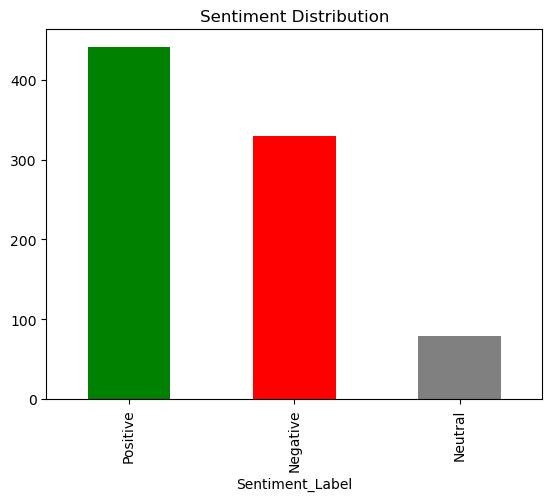

In [10]:
df['Sentiment_Label'].value_counts().plot(kind='bar', title='Sentiment Distribution', color=['green', 'red', 'gray'])


In [11]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             850 non-null    object 
 1   location         850 non-null    object 
 2   Date             850 non-null    object 
 3   Rating           705 non-null    float64
 4   Review           850 non-null    object 
 5   Image_Links      850 non-null    object 
 6   cleaned_review   850 non-null    object 
 7   neg              850 non-null    float64
 8   neu              850 non-null    float64
 9   pos              850 non-null    float64
 10  compound         850 non-null    float64
 11  Sentiment_Label  850 non-null    object 
dtypes: float64(5), object(7)
memory usage: 79.8+ KB


name                 0
location             0
Date                 0
Rating             145
Review               0
Image_Links          0
cleaned_review       0
neg                  0
neu                  0
pos                  0
compound             0
Sentiment_Label      0
dtype: int64

In [12]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.dropna(subset=['cleaned_review'], inplace=True)

In [13]:
df

,name,location,Date,Rating,Review,Image_Links,cleaned_review,neg,neu,pos,compound,Sentiment_Label
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],amber ladonna starbucks southwest parkway alwa...,0.000,0.645,0.355,0.8779,Positive
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],starbucks fire station 436 altamonte spring fl...,0.081,0.566,0.353,0.9670,Positive
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,wanted go way recognize starbucks employee bil...,0.143,0.630,0.226,0.4215,Positive
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],friend starbucks card ’ work thankful worker p...,0.094,0.444,0.462,0.9623,Positive
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,’ kick drinking 5 cup warm water work instacar...,0.045,0.472,0.483,0.9723,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images'],ordered two venti frappacinos without whipped ...,0.154,0.769,0.077,-0.3182,Negative
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images'],review text,0.000,1.000,0.000,0.0000,Neutral
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images'],demanded tip made wait coffee cold melted 20 y...,0.337,0.663,0.000,-0.6249,Negative
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images'],review text,0.000,1.000,0.000,0.0000,Neutral


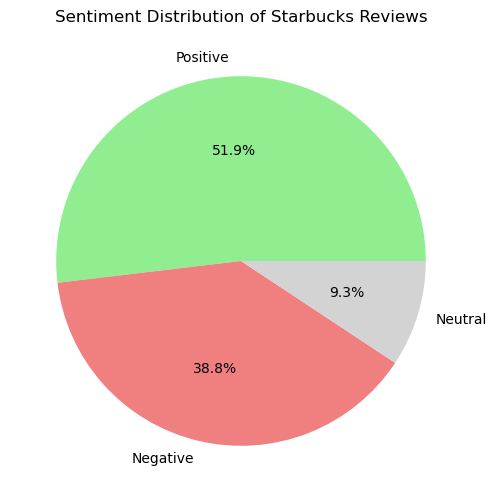

In [14]:
import matplotlib.pyplot as plt

sentiment_counts = df['Sentiment_Label'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightgrey'])
plt.title('Sentiment Distribution of Starbucks Reviews')
plt.show()


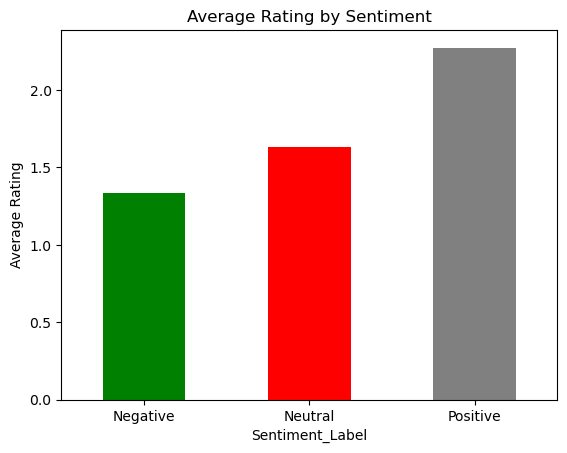

In [15]:
avg_rating = df.groupby('Sentiment_Label')['Rating'].mean()

avg_rating.plot(kind='bar', color=['green', 'red', 'grey'], title='Average Rating by Sentiment')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()


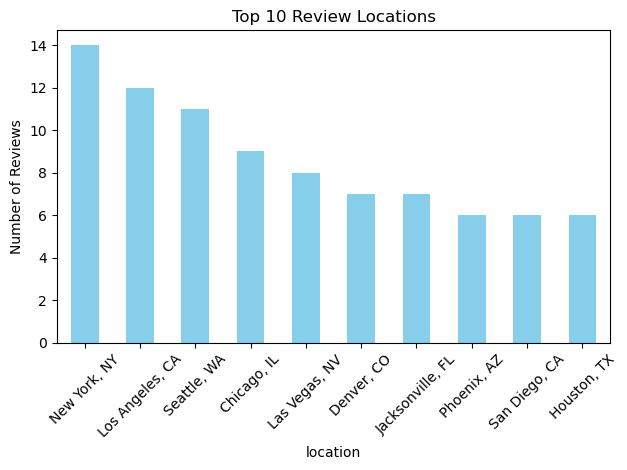

In [16]:
top_locations = df['location'].value_counts().head(10)

top_locations.plot(kind='bar', color='skyblue', title='Top 10 Review Locations')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# Remove "Reviewed " from each date string
df['Cleaned_Date'] = df['Date'].str.replace('Reviewed ', '', regex=False)

# Convert to datetime
df['Cleaned_Date'] = pd.to_datetime(df['Cleaned_Date'], errors='coerce')

# Create year-month column for trend analysis
df['YearMonth'] = df['Cleaned_Date'].dt.to_period('M')

# Optional: Check if everything worked
print(df[['Date', 'Cleaned_Date', 'YearMonth']].head())


                      Date Cleaned_Date YearMonth
0  Reviewed Sept. 13, 2023   2023-09-13   2023-09
1   Reviewed July 16, 2023   2023-07-16   2023-07
2    Reviewed July 5, 2023   2023-07-05   2023-07
3    Reviewed May 26, 2023   2023-05-26   2023-05
4   Reviewed Jan. 22, 2023   2023-01-22   2023-01


C:\Users\Farishtey\AppData\Local\Temp\ipykernel_20292\2283456882.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Cleaned_Date'] = pd.to_datetime(df['Cleaned_Date'], errors='coerce')


In [18]:
df['Cleaned_Date'] = pd.to_datetime(df['Cleaned_Date'], format='%b. %d, %Y', errors='coerce')

In [29]:
df.drop(columns=['Month_Year'], inplace=True)
df['Year'] = df['Cleaned_Date'].dt.year
df

,name,location,Date,Rating,Review,Image_Links,cleaned_review,neg,neu,pos,compound,Sentiment_Label,Cleaned_Date,YearMonth,Year
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],amber ladonna starbucks southwest parkway alwa...,0.000,0.645,0.355,0.8779,Positive,2023-09-13,2023-09,2023
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],starbucks fire station 436 altamonte spring fl...,0.081,0.566,0.353,0.9670,Positive,2023-07-16,2023-07,2023
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,wanted go way recognize starbucks employee bil...,0.143,0.630,0.226,0.4215,Positive,2023-07-05,2023-07,2023
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],friend starbucks card ’ work thankful worker p...,0.094,0.444,0.462,0.9623,Positive,2023-05-26,2023-05,2023
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,’ kick drinking 5 cup warm water work instacar...,0.045,0.472,0.483,0.9723,Positive,2023-01-22,2023-01,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images'],ordered two venti frappacinos without whipped ...,0.154,0.769,0.077,-0.3182,Negative,2006-07-13,2006-07,2006
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images'],review text,0.000,1.000,0.000,0.0000,Neutral,2005-01-03,2005-01,2005
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images'],demanded tip made wait coffee cold melted 20 y...,0.337,0.663,0.000,-0.6249,Negative,2004-11-05,2004-11,2004
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images'],review text,0.000,1.000,0.000,0.0000,Neutral,2004-10-20,2004-10,2004


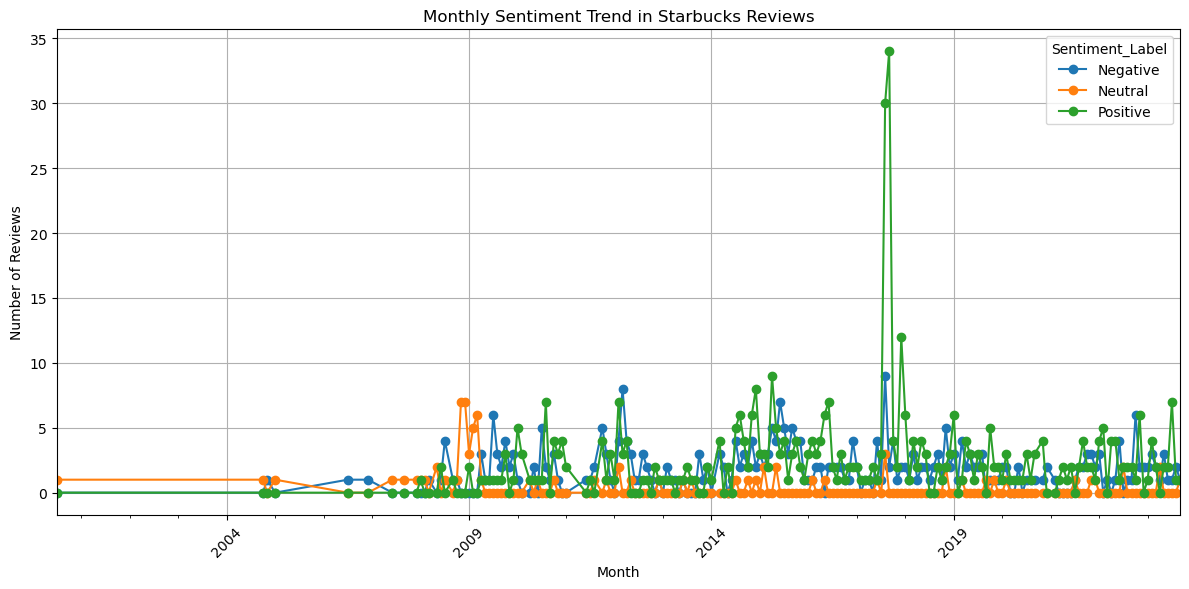

In [19]:
# Group by month and sentiment
monthly_sentiment = df.groupby(['YearMonth', 'Sentiment_Label']).size().unstack().fillna(0)

# Plot
monthly_sentiment.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Monthly Sentiment Trend in Starbucks Reviews')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
positive_reviews = df[df['Sentiment_Label'] == 'Positive']['cleaned_review']
negative_reviews = df[df['Sentiment_Label'] == 'Negative']['cleaned_review']

In [22]:
from collections import Counter

positive_words = ' '.join(positive_reviews).split()
negative_words = ' '.join(negative_reviews).split()

positive_counts = Counter(positive_words)
negative_counts = Counter(negative_words)

# Top N words
top_n = 15
most_common_positive = positive_counts.most_common(top_n)
most_common_negative = negative_counts.most_common(top_n)


C:\Users\Farishtey\AppData\Local\Temp\ipykernel_20292\3492676157.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=pos_df, ax=axes[0], palette='Greens_r')
C:\Users\Farishtey\AppData\Local\Temp\ipykernel_20292\3492676157.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=neg_df, ax=axes[1], palette='Reds_r')


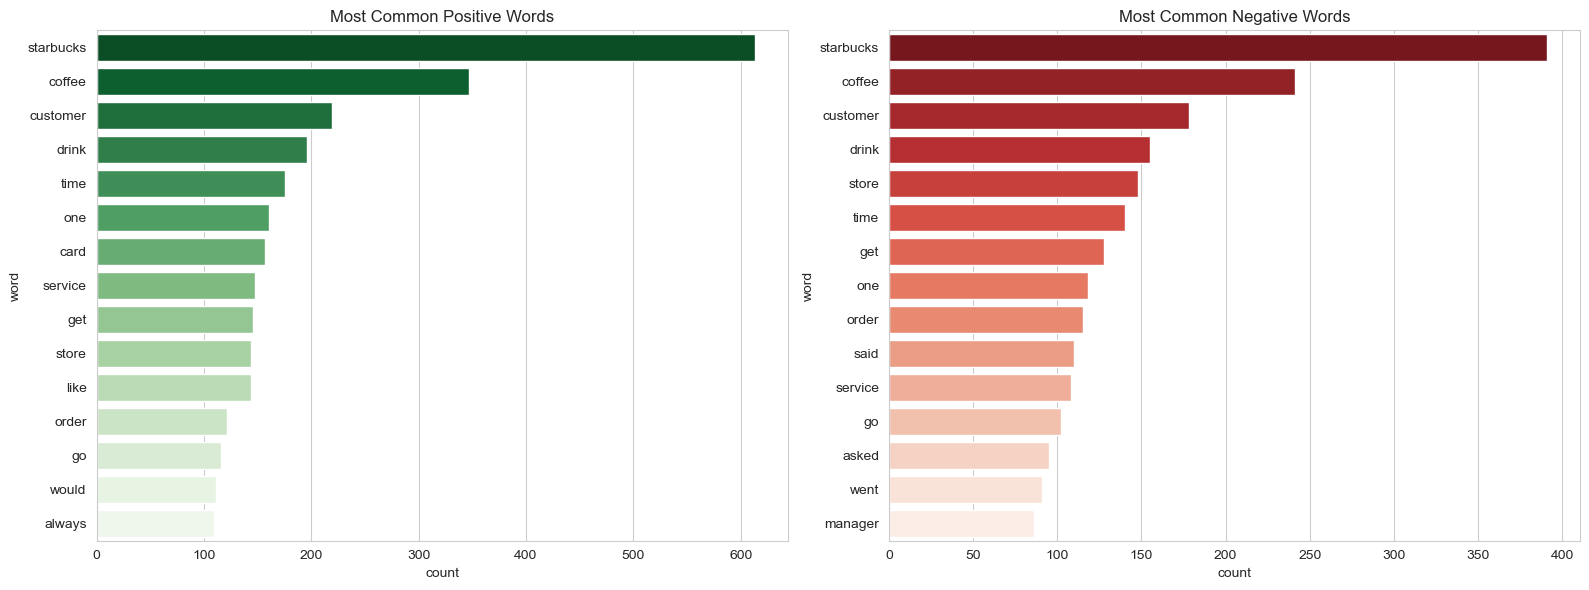

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame
pos_df = pd.DataFrame(most_common_positive, columns=['word', 'count'])
neg_df = pd.DataFrame(most_common_negative, columns=['word', 'count'])

# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive words
sns.barplot(x='count', y='word', data=pos_df, ax=axes[0], palette='Greens_r')
axes[0].set_title('Most Common Positive Words')

# Negative words
sns.barplot(x='count', y='word', data=neg_df, ax=axes[1], palette='Reds_r')
axes[1].set_title('Most Common Negative Words')

plt.tight_layout()
plt.show()



C:\Users\Farishtey\AppData\Local\Temp\ipykernel_20292\65734861.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


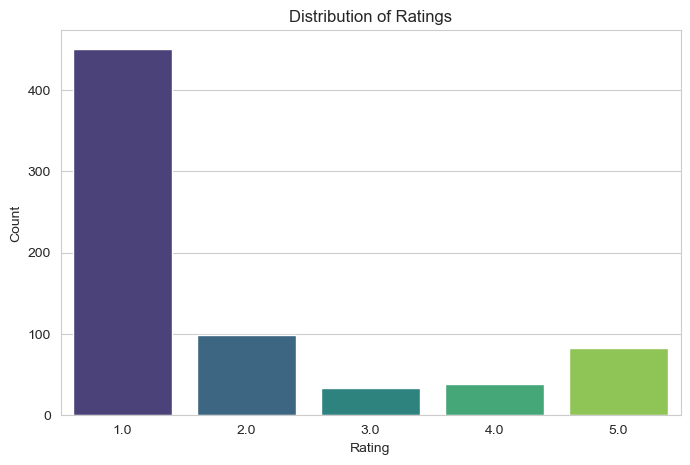

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Basic rating distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

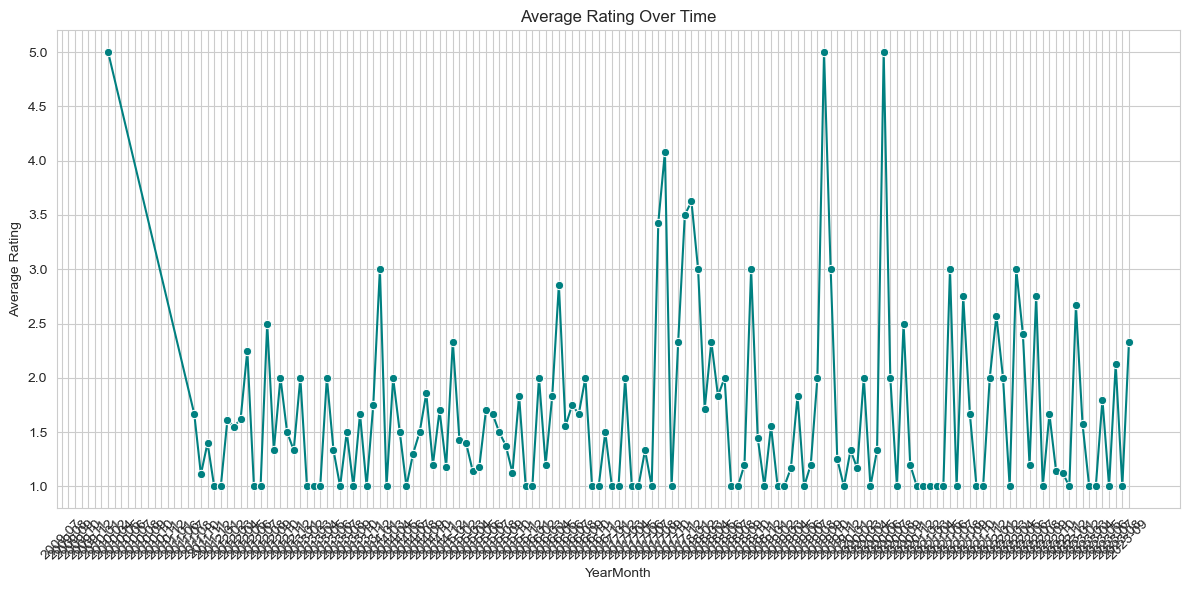

In [30]:
# Ensure Cleaned_Date is in datetime (skip this if already done)
# df['Cleaned_Date'] = pd.to_datetime(df['Date'].str.replace('Reviewed ', ''), errors='coerce')

# Group by month/year and calculate average rating
df['YearMonth'] = df['Cleaned_Date'].dt.to_period('M')
rating_trend = df.groupby('YearMonth')['Rating'].mean().reset_index()
rating_trend['YearMonth'] = rating_trend['YearMonth'].astype(str)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Rating', data=rating_trend, marker='o', color='teal')
plt.title('Average Rating Over Time')
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.xlabel('YearMonth')
plt.tight_layout()
plt.show()


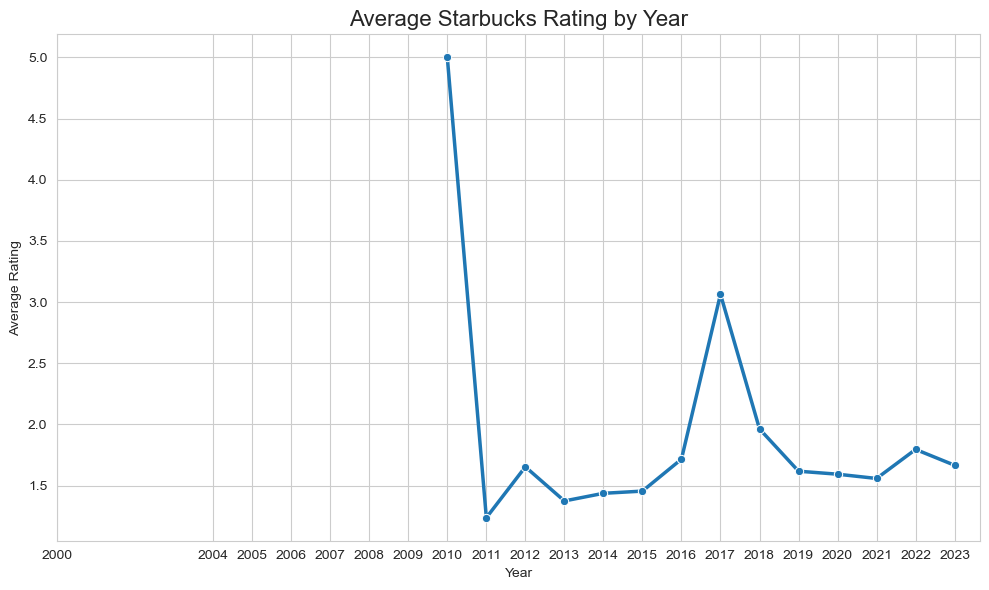

In [32]:
yearly_avg_rating = df.groupby('Year')['Rating'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_avg_rating, x='Year', y='Rating', marker='o', linewidth=2.5)

plt.title('Average Starbucks Rating by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(yearly_avg_rating['Year'].unique())  # ensure only valid years
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
yearly_review_counts = df.groupby('Year').size().reset_index(name='Review_Count')
yearly_review_counts

,Year,Review_Count
0,2000,1
1,2004,2
2,2005,1
3,2006,2
4,2007,3
5,2008,32
6,2009,52
7,2010,48
8,2011,26
9,2012,52


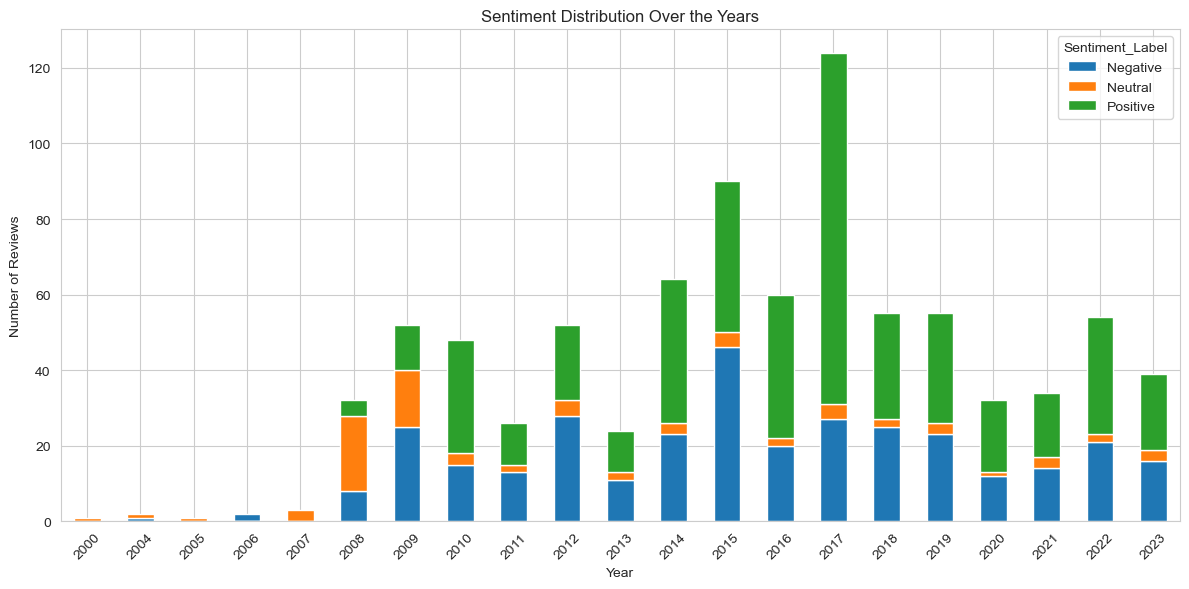

In [34]:
sentiment_trend = df.groupby(['Year', 'Sentiment_Label']).size().reset_index(name='Count')
sentiment_pivot = sentiment_trend.pivot(index='Year', columns='Sentiment_Label', values='Count').fillna(0)

sentiment_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution Over the Years')
plt.ylabel('Number of Reviews')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
from collections import Counter
from wordcloud import WordCloud

def get_top_words_by_year(df, year, sentiment='Negative', top_n=30):
    text = " ".join(df[(df['Year'] == year) & (df['Sentiment_Label'] == sentiment)]['cleaned_review'])
    return Counter(text.split()).most_common(top_n)

# Example: get top negative words in 2023
top_negative_2023 = get_top_words_by_year(df, 2023, sentiment='Negative')
print("Top negative words in 2023:", top_negative_2023)

# Now compare with early year like 2010
top_positive_2010 = get_top_words_by_year(df, 2010, sentiment='Positive')
print("Top positive words in 2010:", top_positive_2010)


Top negative words in 2023: [('starbucks', 14), ('drink', 8), ('would', 7), ('’', 7), ('coffee', 7), ('order', 5), ('customer', 5), ('service', 5), ('make', 5), ('get', 5), ('2', 5), ('caramel', 5), ('money', 5), ('tip', 5), ('time', 4), ('never', 4), ('said', 4), ('ordered', 4), ('even', 4), ('bad', 4), ('go', 4), ('lost', 4), ('one', 4), ('name', 4), ('back', 4), ('store', 4), ('refund', 4), ('3', 3), ('got', 3), ('u', 3)]
Top positive words in 2010: [('starbucks', 41), ('one', 19), ('coffee', 18), ('card', 17), ('cup', 12), ('customer', 11), ('told', 11), ('would', 10), ('said', 9), ('like', 9), ('around', 9), ('went', 9), ('time', 9), ('year', 9), ('drink', 8), ('employee', 8), ('new', 7), ('could', 7), ('milk', 7), ('back', 7), ('credit', 6), ('never', 6), ('put', 6), ('store', 6), ('order', 6), ('go', 6), ('asked', 6), ('location', 6), ('gave', 6), ('want', 5)]


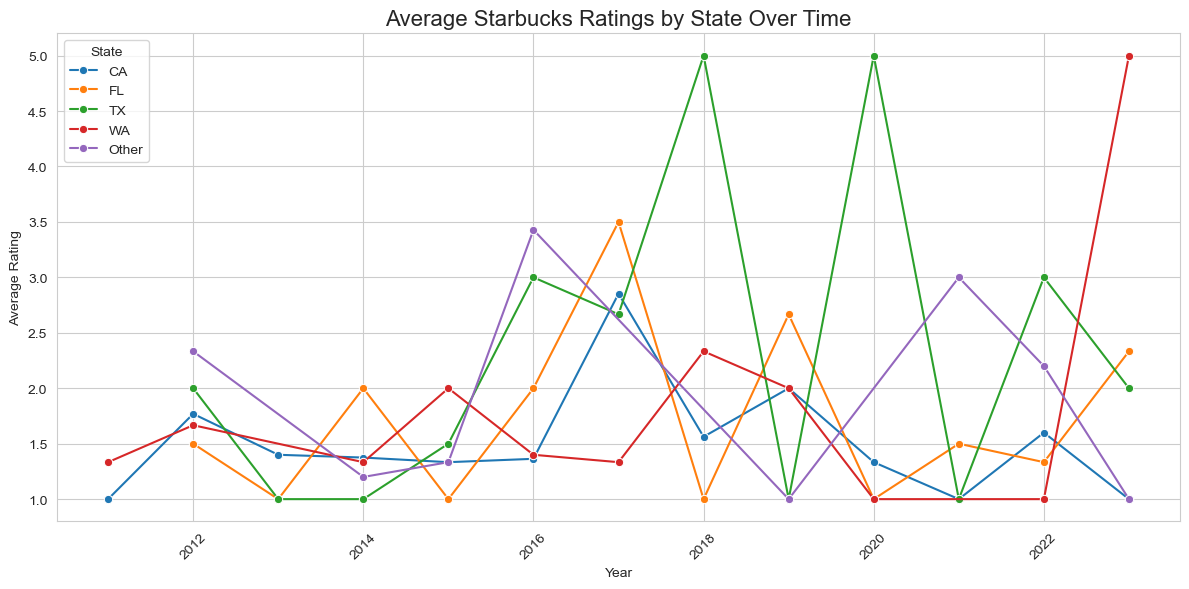

In [41]:
# Create a new column 'State' with the part after the comma (i.e., the state code)
df['State'] = df['location'].apply(lambda x: x.split(',')[-1].strip() if pd.notnull(x) and ',' in x else None)
state_yearly_ratings = df.groupby(['Year', 'State'])['Rating'].mean().reset_index()
# Get top 5 states by number of reviews
top_states = df['State'].value_counts().nlargest(5).index.tolist()

# Filter the dataframe
filtered = state_yearly_ratings[state_yearly_ratings['State'].isin(top_states)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered, x='Year', y='Rating', hue='State', marker='o')
plt.title('Average Starbucks Ratings by State Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


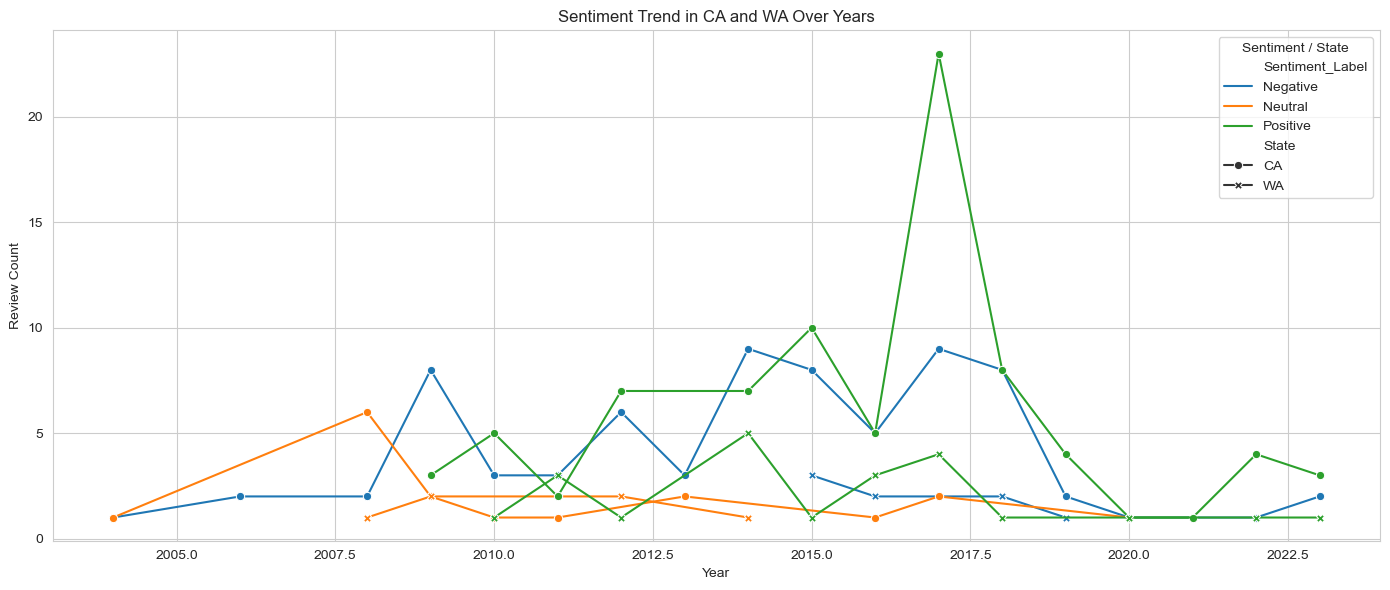

In [42]:
# Group by Year, State, and Sentiment
sentiment_trend = df.groupby(['Year', 'State', 'Sentiment_Label']).size().reset_index(name='Count')

# Filter for CA and WA
selected_states = sentiment_trend[sentiment_trend['State'].isin(['CA', 'WA'])]

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=selected_states, x='Year', y='Count', hue='Sentiment_Label', style='State', markers=True, dashes=False)
plt.title('Sentiment Trend in CA and WA Over Years')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.legend(title='Sentiment / State')
plt.grid(True)
plt.tight_layout()
plt.show()


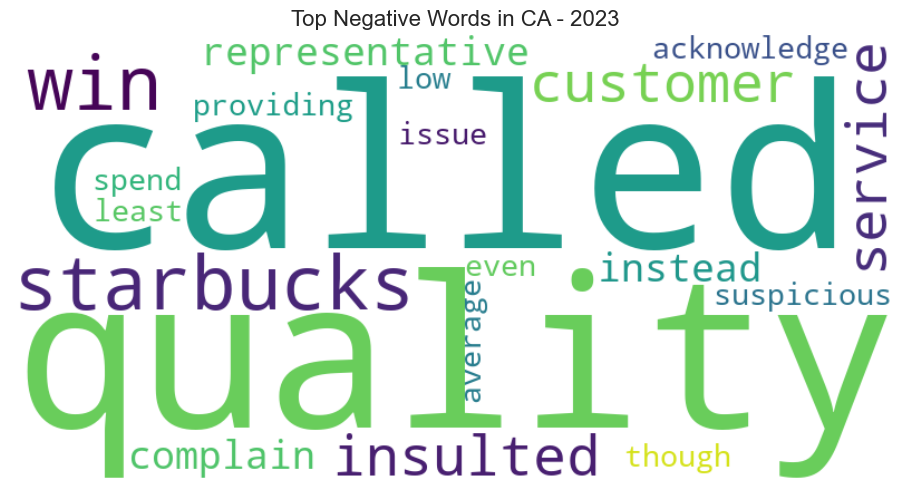

No 'Negative' sentiment reviews found for WA in 2023.


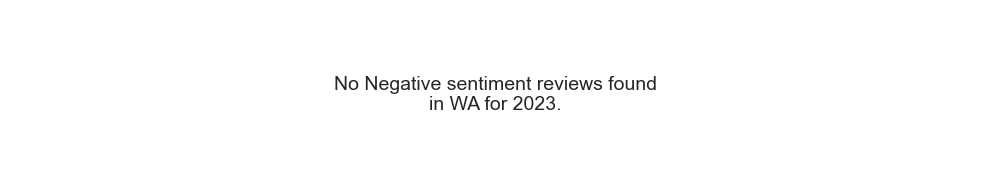

[]

In [55]:
# Function you already defined earlier:

from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def get_top_words_by_year_state(df, year, state, sentiment='Negative', top_n=30):
    # Filter the dataframe
    filtered_reviews = df[
        (df['Year'] == year) &
        (df['State'] == state) &
        (df['Sentiment_Label'] == sentiment)
    ]['cleaned_review'].dropna()

    # Handle the case where no reviews are found
    if filtered_reviews.empty:
        print(f"No '{sentiment}' sentiment reviews found for {state} in {year}.")
        
        # Optional: Display a blank plot with a friendly message
        plt.figure(figsize=(10, 2))
        plt.text(0.5, 0.5, f"No {sentiment} sentiment reviews found\nin {state} for {year}.", 
                 fontsize=14, ha='center', va='center')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        
        return []

    # Join text and generate word frequencies
    text = " ".join(filtered_reviews)
    word_freq = Counter(text.split())
    top_words = word_freq.most_common(top_n)

    # Create and show word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white')\
        .generate_from_frequencies(dict(top_words))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Top {sentiment} Words in {state} - {year}", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return top_words

get_top_words_by_year_state(df, year=2023, state='CA', sentiment='Negative', top_n=20)
get_top_words_by_year_state(df, year=2023, state='WA', sentiment='Negative', top_n=20)


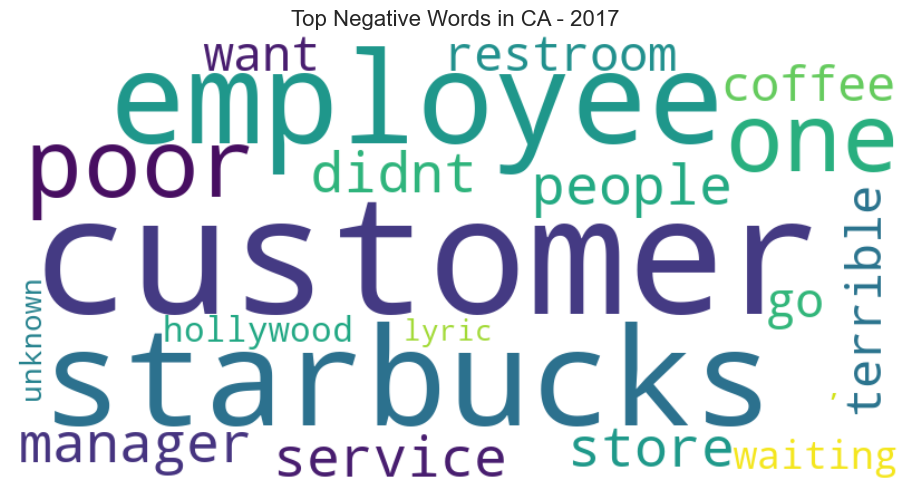

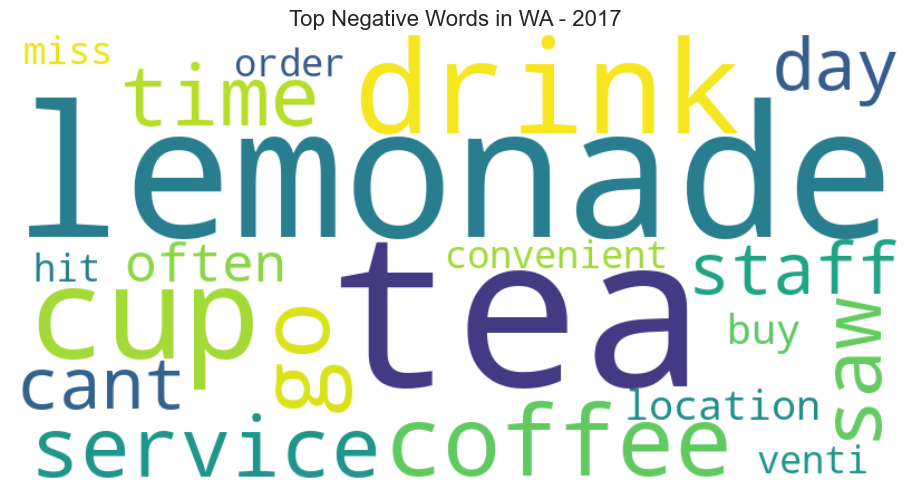

[('tea', 4),
 ('lemonade', 4),
 ('drink', 4),
 ('cup', 4),
 ('go', 2),
 ('coffee', 2),
 ('service', 2),
 ('time', 2),
 ('saw', 2),
 ('staff', 2),
 ('day', 2),
 ('cant', 2),
 ('often', 1),
 ('location', 1),
 ('buy', 1),
 ('convenient', 1),
 ('hit', 1),
 ('miss', 1),
 ('order', 1),
 ('venti', 1)]

In [56]:
get_top_words_by_year_state(df, year=2017, state='CA', sentiment='Negative', top_n=20)
get_top_words_by_year_state(df, year=2017, state='WA', sentiment='Negative', top_n=20)


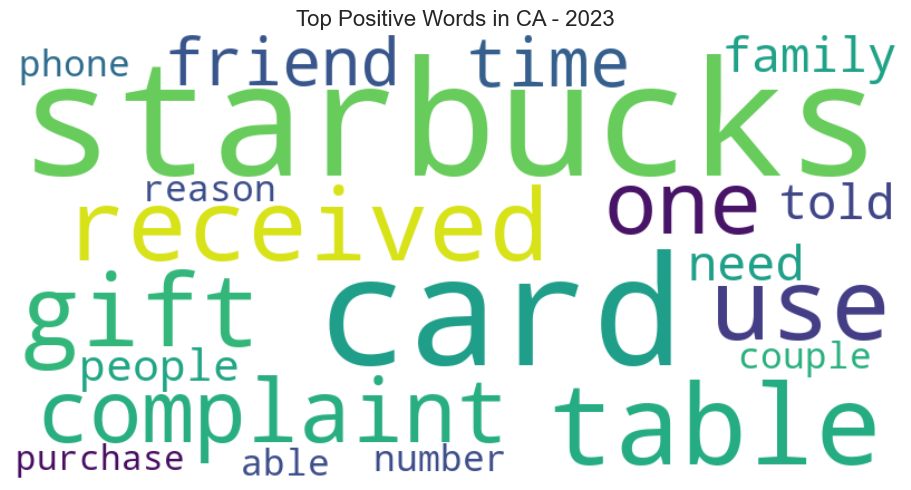

[('starbucks', 12),
 ('card', 11),
 ('table', 5),
 ('received', 4),
 ('use', 4),
 ('gift', 4),
 ('complaint', 3),
 ('one', 3),
 ('time', 3),
 ('friend', 3),
 ('family', 3),
 ('told', 3),
 ('need', 3),
 ('people', 3),
 ('couple', 2),
 ('phone', 2),
 ('number', 2),
 ('reason', 2),
 ('able', 2),
 ('purchase', 2)]

In [123]:
get_top_words_by_year_state(df, year=2023, state='CA', sentiment='Positive', top_n=20)

In [49]:
df[(df['Year'] == 2023) & (df['State'] == 'WA') & (df['Sentiment_Label'] == 'Negative')].shape[0]

0

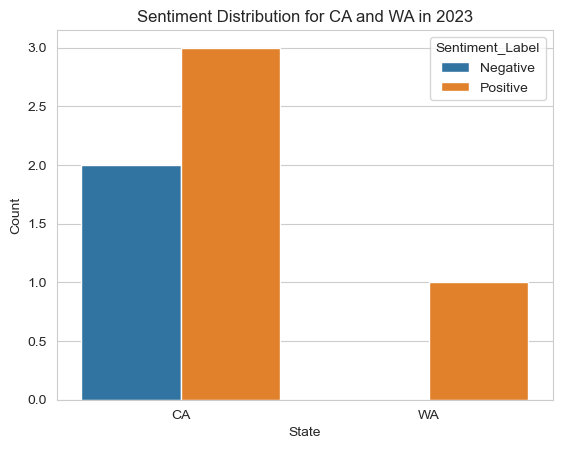

In [50]:
sentiment_split = df[(df['Year'] == 2023) & (df['State'].isin(['CA', 'WA']))] \
    .groupby(['State', 'Sentiment_Label']) \
    .size().reset_index(name='Count')

sns.barplot(data=sentiment_split, x='State', y='Count', hue='Sentiment_Label')
plt.title('Sentiment Distribution for CA and WA in 2023')
plt.show()

In [51]:
def get_top_words_no_plot(df, year, state, sentiment='Negative', top_n=30):
    text = " ".join(df[
        (df['Year'] == year) & 
        (df['State'] == state) & 
        (df['Sentiment_Label'] == sentiment)
    ]['cleaned_review'])

    word_freq = Counter(text.split())
    return word_freq.most_common(top_n)

get_top_words_no_plot(df, 2023, 'WA', sentiment='Negative')


[]

<Figure size 2000x600 with 0 Axes>

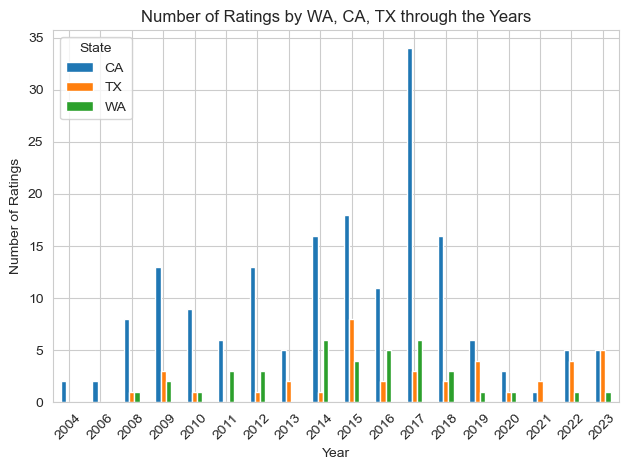

In [122]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter the dataset for states: WA, CA, TX
df_states = df[df['State'].isin(['WA', 'CA', 'TX'])]

# Group by state and year, and count the number of reviews
ratings_by_state_year = df_states.groupby(['State', 'Year']).size().unstack(fill_value=0)

# Plot the results
plt.figure(figsize=(20, 6))
ratings_by_state_year.T.plot(kind='bar', stacked=False)
plt.title('Number of Ratings by WA, CA, TX through the Years')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.legend(title='State', loc='upper left')
plt.tight_layout()
plt.show()


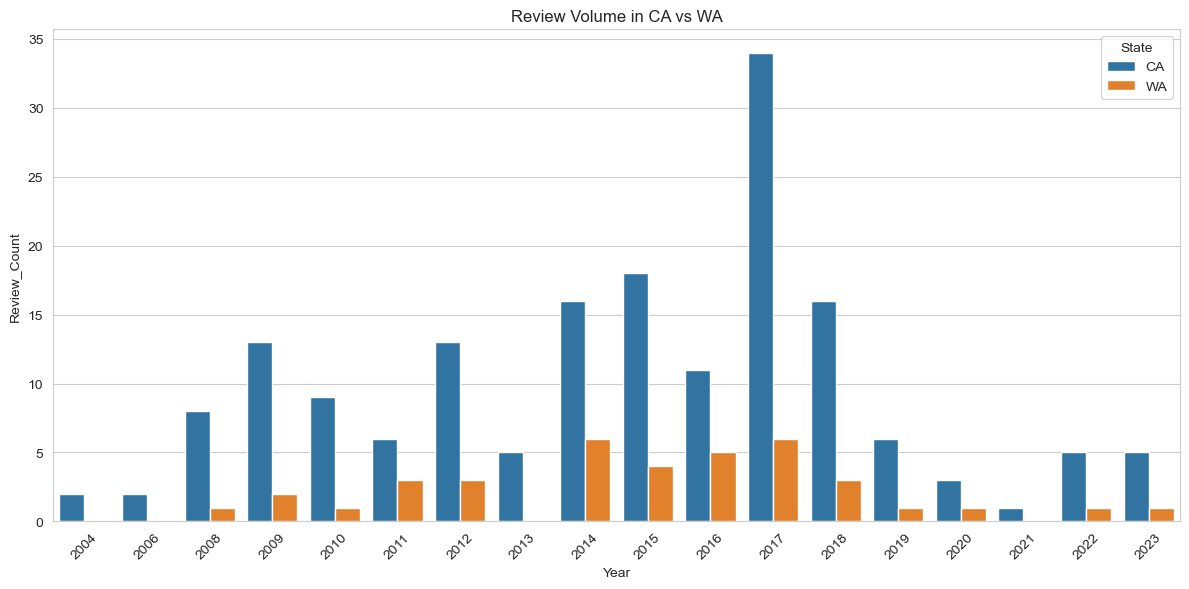

In [46]:
review_volume = df.groupby(['Year', 'State']).size().reset_index(name='Review_Count')
top_states = review_volume[review_volume['State'].isin(['CA', 'WA'])]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x='Year', y='Review_Count', hue='State')
plt.title('Review Volume in CA vs WA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [52]:
df[(df['Year'] == 2023) & (df['State'] == 'WA') & (df['Sentiment_Label'] == 'Negative')].shape[0]

0

In [53]:
df[
    (df['Year'] == 2023) &
    (df['State'] == 'WA') &
    (df['Sentiment_Label'] == 'Negative') &
    (df['cleaned_review'].str.strip() != '')
].shape[0]


0

In [54]:
df[
    (df['Year'] == 2023) &
    (df['State'] == 'WA') &
    (df['Sentiment_Label'] == 'Negative')
][['Review', 'cleaned_review']].head(10)


,Review,cleaned_review


In [37]:
"""
What Was Going Right in 2010? (Top Positive Words)
‘Starbucks’, ‘coffee’, ‘cup’, ‘drink’ — People were genuinely enjoying the core product.

Words like ‘card’, ‘credit’, ‘employee’, ‘store’, ‘location’ — indicate smooth transactions and good staff/store experiences.

‘Customer’, ‘told’, ‘like’, ‘back’, ‘gave’, ‘want’ — implies strong customer service and satisfaction.

Even ‘milk’, ‘order’, ‘asked’ — suggest positive customization experiences.

✅ Conclusion: In 2010, customers felt heard, received good service, and enjoyed their orders. Starbucks was more than a brand — it was an experience.

"""

'\nWhat Was Going Right in 2010? (Top Positive Words)\n‘Starbucks’, ‘coffee’, ‘cup’, ‘drink’ — People were genuinely enjoying the core product.\n\nWords like ‘card’, ‘credit’, ‘employee’, ‘store’, ‘location’ — indicate smooth transactions and good staff/store experiences.\n\n‘Customer’, ‘told’, ‘like’, ‘back’, ‘gave’, ‘want’ — implies strong customer service and satisfaction.\n\nEven ‘milk’, ‘order’, ‘asked’ — suggest positive customization experiences.\n\n✅ Conclusion: In 2010, customers felt heard, received good service, and enjoyed their orders. Starbucks was more than a brand — it was an experience.\n\n'

In [38]:
"""
 What Went Wrong in 2023? (Top Negative Words)
‘Starbucks’, ‘drink’, ‘coffee’, ‘order’, ‘caramel’ — Still core items, but now mentioned negatively.

‘Customer’, ‘service’, ‘money’, ‘refund’, ‘tip’ — Big red flags: customer dissatisfaction, money issues, bad service.

‘Never’, ‘bad’, ‘lost’, ‘back’, ‘said’, ‘make’ — Indicate poor experiences, unfulfilled orders, frustration.

Even numbers (‘2’, ‘3’, ‘get’, ‘go’, ‘name’, ‘store’) imply issues with ordering, waiting, or pickup confusion.

🚨 Conclusion: In 2023, the same core elements (coffee, orders, service) are causing frustration. 
The tone has flipped — customers are annoyed, feeling robbed or ignored.
"""

'\n What Went Wrong in 2023? (Top Negative Words)\n‘Starbucks’, ‘drink’, ‘coffee’, ‘order’, ‘caramel’ — Still core items, but now mentioned negatively.\n\n‘Customer’, ‘service’, ‘money’, ‘refund’, ‘tip’ — Big red flags: customer dissatisfaction, money issues, bad service.\n\n‘Never’, ‘bad’, ‘lost’, ‘back’, ‘said’, ‘make’ — Indicate poor experiences, unfulfilled orders, frustration.\n\nEven numbers (‘2’, ‘3’, ‘get’, ‘go’, ‘name’, ‘store’) imply issues with ordering, waiting, or pickup confusion.\n\n🚨 Conclusion: In 2023, the same core elements (coffee, orders, service) are causing frustration. \nThe tone has flipped — customers are annoyed, feeling robbed or ignored.\n'

In [57]:
df[df['Year'] == 2023]['State'].value_counts()

State
TX       5
Other    5
CA       5
FL       3
PA       2
NC       2
MD       2
NJ       2
GA       2
AZ       1
TN       1
NV       1
VA       1
MA       1
HI       1
DC       1
OH       1
OR       1
WA       1
IA       1
Name: count, dtype: int64

In [58]:
df[df['Year'] == 2023].groupby('State')['Sentiment_Label'].value_counts().unstack().fillna(0)


Sentiment_Label,Negative,Neutral,Positive
State,,,
AZ,1.0,0.0,0.0
CA,2.0,0.0,3.0
DC,1.0,0.0,0.0
FL,1.0,1.0,1.0
GA,0.0,0.0,2.0
HI,0.0,0.0,1.0
IA,1.0,0.0,0.0
MA,0.0,1.0,0.0
MD,2.0,0.0,0.0


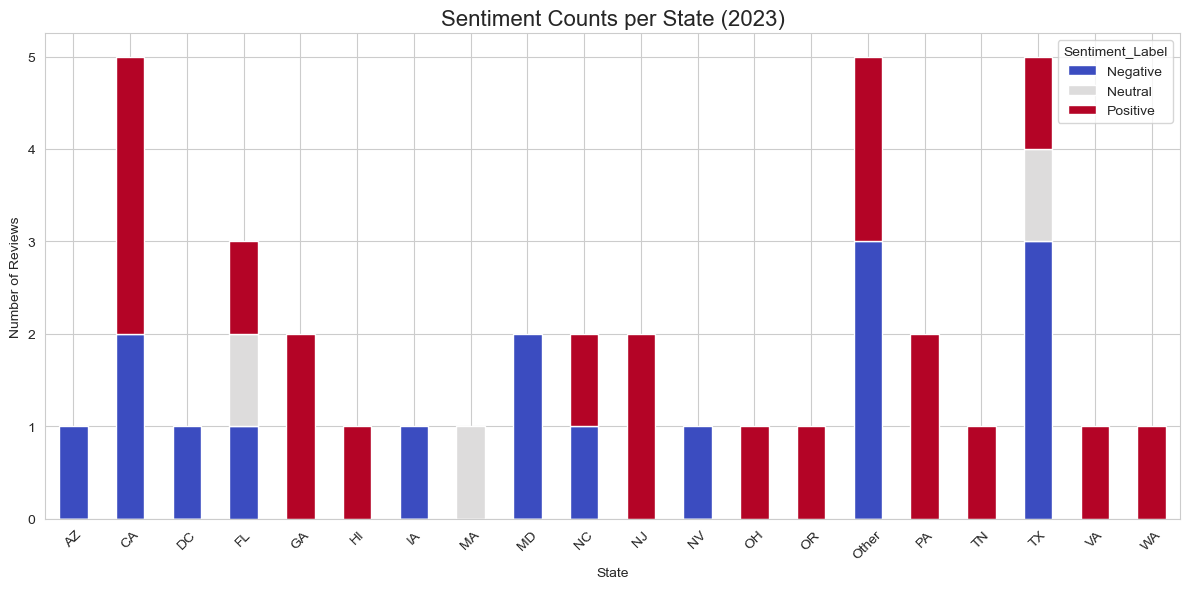

In [60]:
state_sentiment = df[df['Year'] == 2023].groupby(['State', 'Sentiment_Label']).size().unstack(fill_value=0)

state_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Sentiment Counts per State (2023)', fontsize=16)
plt.xlabel('State')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


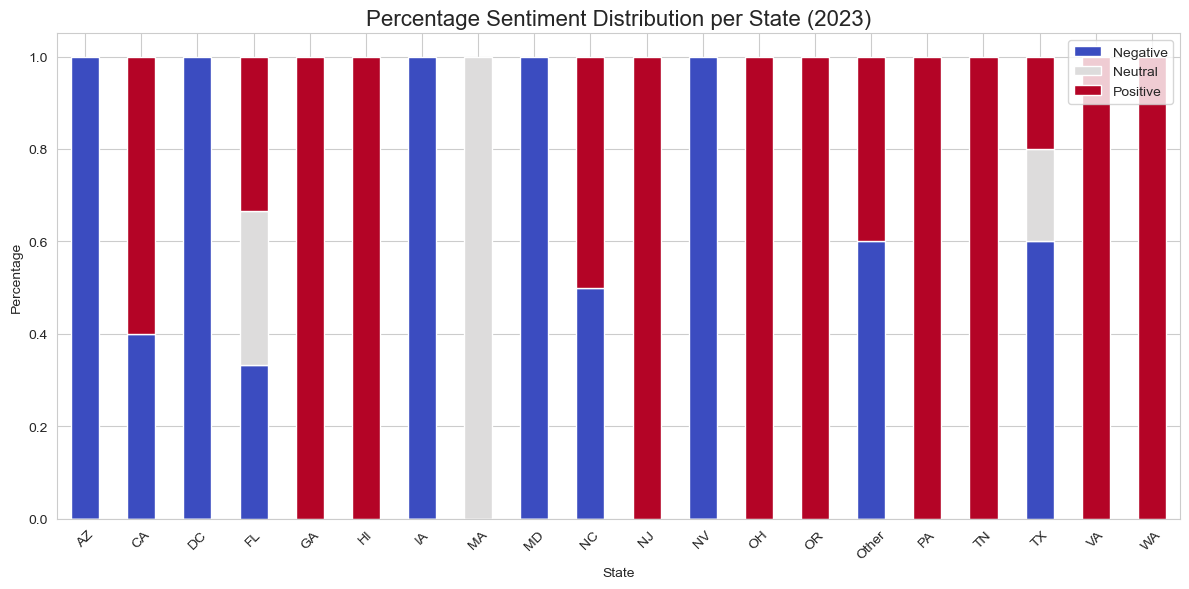

In [63]:
# Convert to percentages
percent_df = state_sentiment.div(state_sentiment.sum(axis=1), axis=0)

percent_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Percentage Sentiment Distribution per State (2023)', fontsize=16)
plt.xlabel('State')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

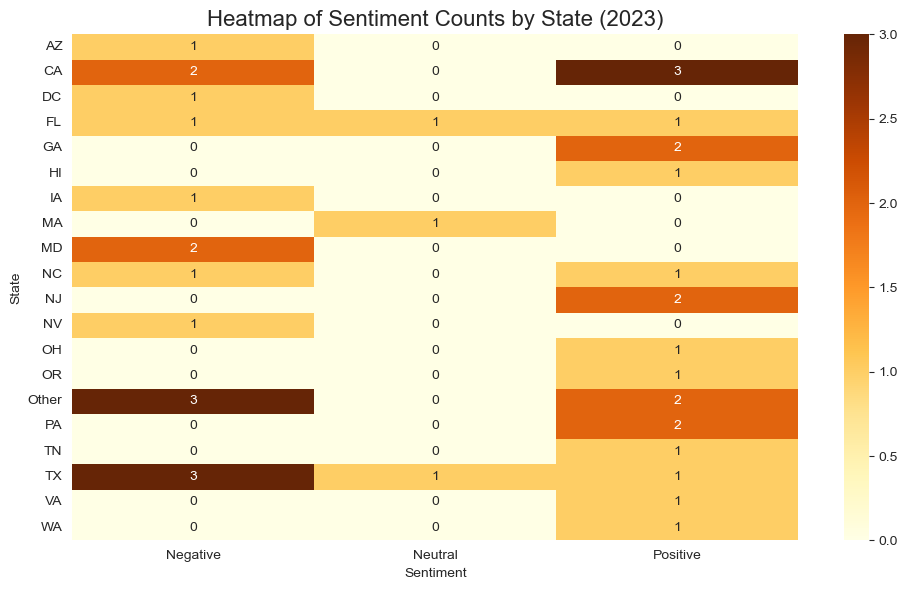

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(state_sentiment, annot=True, fmt=".0f", cmap="YlOrBr")
plt.title('Heatmap of Sentiment Counts by State (2023)', fontsize=16)
plt.xlabel('Sentiment')
plt.ylabel('State')
plt.tight_layout()
plt.show()


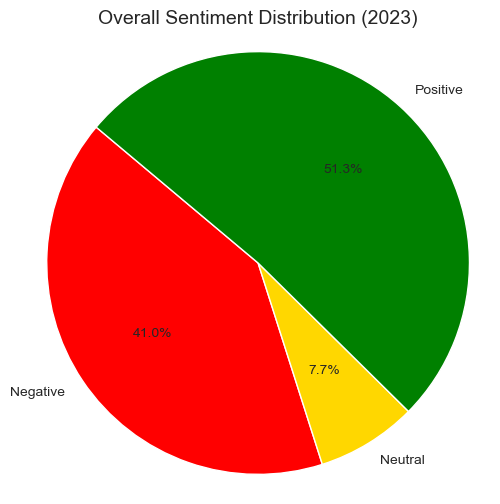

In [65]:
overall_sentiment = state_sentiment.sum()

plt.figure(figsize=(6, 6))
plt.pie(overall_sentiment, labels=overall_sentiment.index, autopct='%1.1f%%', colors=['red', 'gold', 'green'], startangle=140)
plt.title('Overall Sentiment Distribution (2023)', fontsize=14)
plt.axis('equal')
plt.show()


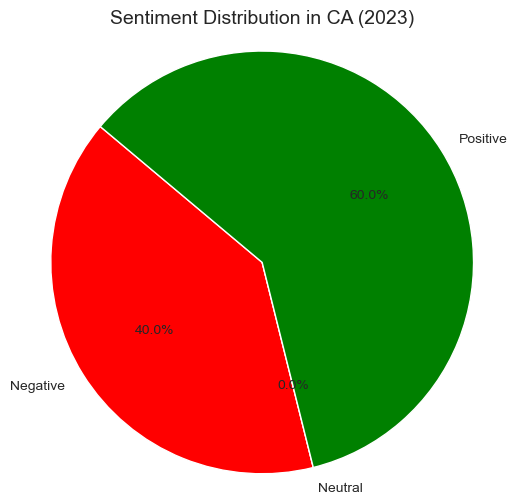

In [61]:
ca_sentiment = state_sentiment.loc['CA']

plt.figure(figsize=(6, 6))
plt.pie(ca_sentiment, labels=ca_sentiment.index, autopct='%1.1f%%', colors=['red', 'gold', 'green'], startangle=140)
plt.title('Sentiment Distribution in CA (2023)', fontsize=14)
plt.axis('equal')
plt.show()


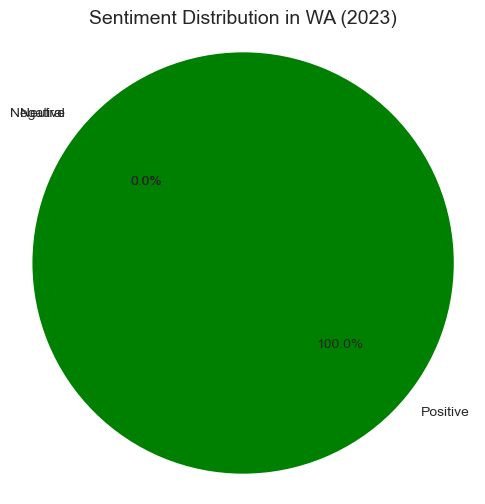

In [62]:
wa_sentiment = state_sentiment.loc['WA']

plt.figure(figsize=(6, 6))
plt.pie(wa_sentiment, labels=wa_sentiment.index, autopct='%1.1f%%', colors=['red', 'gold', 'green'], startangle=140)
plt.title('Sentiment Distribution in WA (2023)', fontsize=14)
plt.axis('equal')
plt.show()


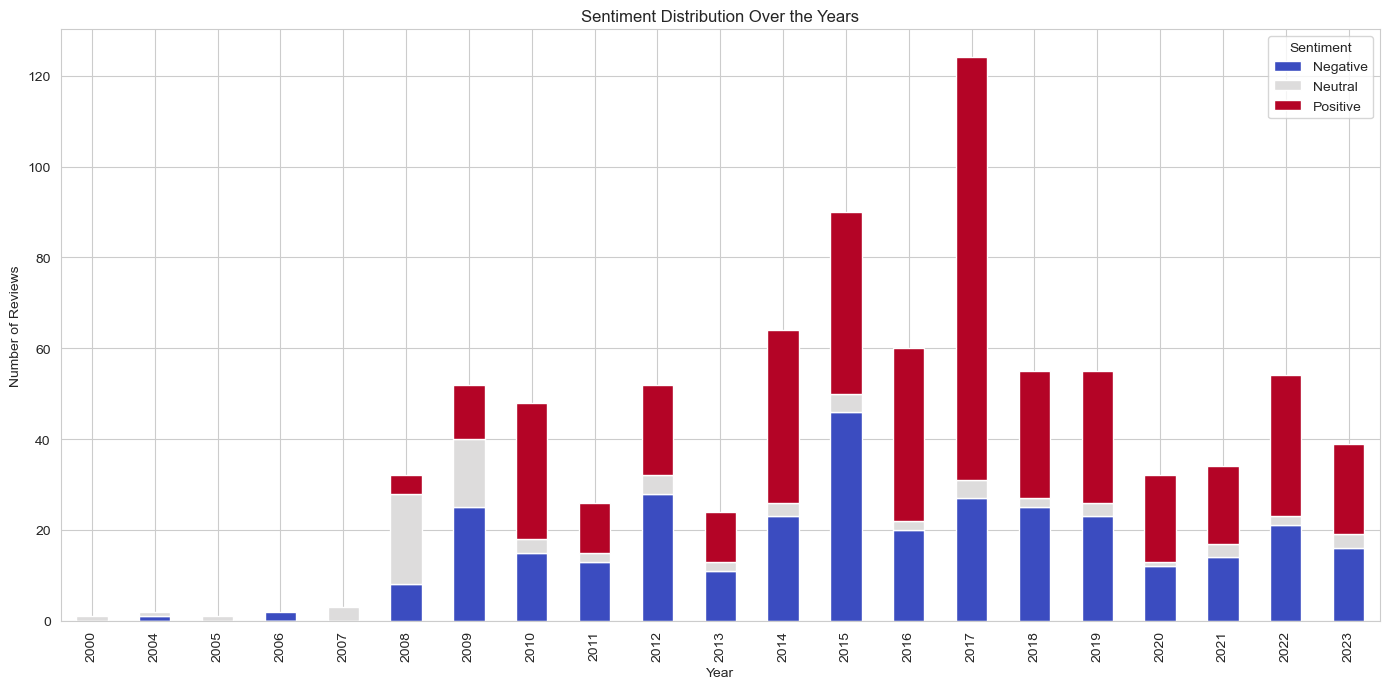

In [124]:


# Group by Year and Sentiment
sentiment_counts = df.groupby(['Year', 'Sentiment_Label']).size().reset_index(name='Count')

# Pivot for plotting
pivot_df = sentiment_counts.pivot(index='Year', columns='Sentiment_Label', values='Count').fillna(0)

# Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='coolwarm')
plt.title('Sentiment Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Use only rows where sentiment label exists
df_ml = df[df['Sentiment_Label'].notnull()].copy()

# Split input and target
X = df_ml['cleaned_review']

y = df_ml['Sentiment_Label']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
from sklearn.pipeline import Pipeline
# Create pipeline
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000))
])

# Fit model
text_clf.fit(X_train, y_train)

# Predict
y_pred = text_clf.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.50      0.37      0.43        62
     Neutral       1.00      0.47      0.64        17
    Positive       0.63      0.80      0.71        91

    accuracy                           0.61       170
   macro avg       0.71      0.55      0.59       170
weighted avg       0.62      0.61      0.60       170


Confusion Matrix:
[[23  0 39]
 [ 5  8  4]
 [18  0 73]]


In [71]:
from sklearn.ensemble import RandomForestClassifier
# Make sure you’re using the correct column
X = df[df['Sentiment_Label'].notnull()]['cleaned_review']
y = df[df['Sentiment_Label'].notnull()]['Sentiment_Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with TF-IDF and Random Forest
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=5000)),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", round(accuracy_score(y_test, y_pred)*100, 2), "%")

Confusion Matrix:
[[26  0 36]
 [ 3  8  6]
 [19  0 72]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.54      0.42      0.47        62
     Neutral       1.00      0.47      0.64        17
    Positive       0.63      0.79      0.70        91

    accuracy                           0.62       170
   macro avg       0.72      0.56      0.61       170
weighted avg       0.64      0.62      0.61       170


Accuracy Score: 62.35 %


In [75]:
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder

# Encode target
le = LabelEncoder()
y = le.fit_transform(df['Sentiment_Label'].dropna())
X = df['cleaned_review'][df['Sentiment_Label'].notnull()]

# Vectorize text
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=8000)
X_vec = tfidf.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Train XGBoost
model = XGBClassifier(random_state=42, n_estimators=300, learning_rate=0.1)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Decode labels
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

print("\nAccuracy Score:", round(accuracy_score(y_test_labels, y_pred_labels)*100, 2), "%")


Confusion Matrix:
[[33  0 29]
 [ 3  8  6]
 [31  0 60]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.49      0.53      0.51        62
     Neutral       1.00      0.47      0.64        17
    Positive       0.63      0.66      0.65        91

    accuracy                           0.59       170
   macro avg       0.71      0.55      0.60       170
weighted avg       0.62      0.59      0.60       170


Accuracy Score: 59.41 %


In [98]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assume your DataFrame is called `df`, with:
# - 'clean_text' column (preprocessed text)
# - 'sentiment' column (target labels: Positive, Neutral, Negative)

# Label Encoding
le = LabelEncoder()
df['label'] = le.fit_transform(df['Sentiment_Label'])  # Converts to 0/1/2

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_review'], df['label'], test_size=0.3, random_state=42, stratify=df['label']
)

# Build Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),  # Unigrams + bigrams
    ('nb', MultinomialNB())
])

# Train Model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Decode predictions back to original labels
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f} %")


Confusion Matrix:
[[  2   0  97]
 [  0  11  13]
 [  0   0 132]]

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.02      0.04        99
     Neutral       1.00      0.46      0.63        24
    Positive       0.55      1.00      0.71       132

    accuracy                           0.57       255
   macro avg       0.85      0.49      0.46       255
weighted avg       0.76      0.57      0.44       255


Accuracy Score: 56.86 %


In [99]:
from sklearn.svm import LinearSVC

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('svc', LinearSVC(class_weight='balanced')

)
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [100]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc * 100:.2f} %")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred, target_names=le.classes_)
print("\nClassification Report:")
print(cr)

Accuracy Score: 65.10 %

Confusion Matrix:
[[ 43   0  56]
 [  7  11   6]
 [ 20   0 112]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.61      0.43      0.51        99
     Neutral       1.00      0.46      0.63        24
    Positive       0.64      0.85      0.73       132

    accuracy                           0.65       255
   macro avg       0.75      0.58      0.62       255
weighted avg       0.67      0.65      0.64       255



In [96]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
import pandas as pd
# Split the dataset into train and test sets
X = df['cleaned_review']
y = df['Sentiment_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1, 2))  # (1,2) for unigrams and bigrams
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Map string labels to numeric labels
label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_train_numeric = y_train.map(label_map)
y_test_numeric = y_test.map(label_map)




In [97]:
# Optionally, compute class weights (not necessary if class_weight='balanced' is used)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_train_numeric), 
    y=y_train_numeric
)

# Initialize and train Logistic Regression model with class weights (balanced automatically handled)
model = LogisticRegression(class_weight='balanced')  # Use balanced class weights
model.fit(X_train_tfidf, y_train_numeric)

# Predictions
y_pred_numeric = model.predict(X_test_tfidf)

# Convert numeric predictions back to original labels
y_pred = pd.Series(y_pred_numeric).map({0: 'Negative', 1: 'Neutral', 2: 'Positive'})

# Evaluate model performance
accuracy = accuracy_score(y_test_numeric, y_pred_numeric)
print("Accuracy Score:", accuracy * 100)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_numeric, y_pred_numeric))

# Classification Report
print("Classification Report:")
print(classification_report(y_test_numeric, y_pred_numeric))


Accuracy Score: 64.31372549019608
Confusion Matrix:
[[56  0 35]
 [ 9 11  3]
 [44  0 97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        91
           1       1.00      0.48      0.65        23
           2       0.72      0.69      0.70       141

    accuracy                           0.64       255
   macro avg       0.74      0.59      0.64       255
weighted avg       0.67      0.64      0.65       255



In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
import numpy as np

# Assuming your DataFrame 'df' with 'cleaned_review' and 'Sentiment_Label' columns exists
# If not, you'll need to load your data here.
# For example:
# df = pd.read_csv('your_data.csv')

# Split the dataset into train and test sets
X = df['cleaned_review']
y = df['Sentiment_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1, 2))  # (1,2) for unigrams and bigrams
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Map string labels to numeric labels
label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_train_numeric = y_train.map(label_map)
y_test_numeric = y_test.map(label_map)

# Initialize and train SVC model with class weights
model_svc = SVC(class_weight='balanced', random_state=42) # Added random_state for reproducibility
model_svc.fit(X_train_tfidf, y_train_numeric)

# Predictions
y_pred_numeric_svc = model_svc.predict(X_test_tfidf)

# Convert numeric predictions back to original labels (optional for evaluation)
y_pred_svc = pd.Series(y_pred_numeric_svc).map({0: 'Negative', 1: 'Neutral', 2: 'Positive'})

# Evaluate SVC model performance
accuracy_svc = accuracy_score(y_test_numeric, y_pred_numeric_svc)
print("SVC Accuracy Score:", accuracy_svc * 100)

# Confusion Matrix for SVC
print("\nSVC Confusion Matrix:")
print(confusion_matrix(y_test_numeric, y_pred_numeric_svc))

# Classification Report for SVC
print("\nSVC Classification Report:")
print(classification_report(y_test_numeric, y_pred_numeric_svc))

SVC Accuracy Score: 64.70588235294117

SVC Confusion Matrix:
[[34  0 28]
 [ 5  8  4]
 [23  0 68]]

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        62
           1       1.00      0.47      0.64        17
           2       0.68      0.75      0.71        91

    accuracy                           0.65       170
   macro avg       0.74      0.59      0.63       170
weighted avg       0.66      0.65      0.65       170



In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
import numpy as np

# Assuming your DataFrame 'df' with 'cleaned_review' and 'Sentiment_Label' columns exists
# If not, you'll need to load your data here.
# For example:
# df = pd.read_csv('your_data.csv')

# Split the dataset into train and test sets
X = df['cleaned_review']
y = df['Sentiment_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1, 2))  # (1,2) for unigrams and bigrams
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Map string labels to numeric labels
label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_train_numeric = y_train.map(label_map)
y_test_numeric = y_test.map(label_map)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient for 'rbf'
}

# Initialize SVC model
svc = SVC(class_weight='balanced', random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svc, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_tfidf, y_train_numeric)

# Get the best parameters and the best model
best_params_svc = grid_search.best_params_
best_model_svc = grid_search.best_estimator_

print("Best Hyperparameters for SVC:", best_params_svc)

# Predictions using the best model
y_pred_numeric_svc_tuned = best_model_svc.predict(X_test_tfidf)

# Convert numeric predictions back to original labels (optional for evaluation)
y_pred_svc_tuned = pd.Series(y_pred_numeric_svc_tuned).map({0: 'Negative', 1: 'Neutral', 2: 'Positive'})

# Evaluate the best SVC model performance
accuracy_svc_tuned = accuracy_score(y_test_numeric, y_pred_numeric_svc_tuned)
print("\nTuned SVC Accuracy Score:", accuracy_svc_tuned * 100)

# Confusion Matrix for Tuned SVC
print("\nTuned SVC Confusion Matrix:")
print(confusion_matrix(y_test_numeric, y_pred_numeric_svc_tuned))

# Classification Report for Tuned SVC
print("\nTuned SVC Classification Report:")
print(classification_report(y_test_numeric, y_pred_numeric_svc_tuned))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

Tuned SVC Accuracy Score: 63.52941176470588

Tuned SVC Confusion Matrix:
[[57  0 34]
 [10 11  2]
 [47  0 94]]

Tuned SVC Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.63      0.56        91
           1       1.00      0.48      0.65        23
           2       0.72      0.67      0.69       141

    accuracy                           0.64       255
   macro avg       0.74      0.59      0.63       255
weighted avg       0.67      0.64      0.64       255



In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
import numpy as np

# Assuming your DataFrame 'df' with 'cleaned_review' and 'Sentiment_Label' columns exists
# If not, you'll need to load your data here.
# For example:
# df = pd.read_csv('your_data.csv')

# Split the dataset into train and test sets (using the same split as before for comparison)
X = df['cleaned_review']
y = df['Sentiment_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize the text data using TF-IDF (using the same vectorizer as before)
tfidf = TfidfVectorizer(ngram_range=(1, 2))  # (1,2) for unigrams and bigrams
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Map string labels to numeric labels
label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_train_numeric = y_train.map(label_map)
y_test_numeric = y_test.map(label_map)

# Initialize and train the Multinomial Naive Bayes model
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train_numeric)

# Predictions
y_pred_numeric_nb = model_nb.predict(X_test_tfidf)

# Convert numeric predictions back to original labels (optional for evaluation)
y_pred_nb = pd.Series(y_pred_numeric_nb).map({0: 'Negative', 1: 'Neutral', 2: 'Positive'})

# Evaluate Naive Bayes model performance
accuracy_nb = accuracy_score(y_test_numeric, y_pred_numeric_nb)
print("Naive Bayes Accuracy Score:", accuracy_nb * 100)

# Confusion Matrix for Naive Bayes
print("\nNaive Bayes Confusion Matrix:")
print(confusion_matrix(y_test_numeric, y_pred_numeric_nb))

# Classification Report for Naive Bayes
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test_numeric, y_pred_numeric_nb))

Naive Bayes Accuracy Score: 59.6078431372549

Naive Bayes Confusion Matrix:
[[  3   0  88]
 [  2  11  10]
 [  3   0 138]]

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.03      0.06        91
           1       1.00      0.48      0.65        23
           2       0.58      0.98      0.73       141

    accuracy                           0.60       255
   macro avg       0.65      0.50      0.48       255
weighted avg       0.55      0.60      0.48       255



In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
import numpy as np

# Assuming your DataFrame 'df' with 'cleaned_review' and 'Sentiment_Label' columns exists

# Split the dataset into train and test sets
X = df['cleaned_review']
y = df['Sentiment_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1, 2))  # (1,2) for unigrams and bigrams
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Map string labels to numeric labels
label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_train_numeric = y_train.map(label_map)
y_test_numeric = y_test.map(label_map)

# Define the parameter grid for GridSearchCV
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Different regularization strengths
    'solver': ['liblinear', 'lbfgs'],      # Solvers to try
    'class_weight': ['balanced', None]     # Include the option of not using class weights
}

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter

# Perform GridSearchCV for hyperparameter tuning
grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_lr.fit(X_train_tfidf, y_train_numeric)

# Get the best parameters and the best model
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_

print("Best Hyperparameters for Logistic Regression:", best_params_lr)

# Predictions using the best model
y_pred_numeric_lr_tuned = best_model_lr.predict(X_test_tfidf)

# Convert numeric predictions back to original labels
y_pred_lr_tuned = pd.Series(y_pred_numeric_lr_tuned).map({0: 'Negative', 1: 'Neutral', 2: 'Positive'})

# Evaluate the best Logistic Regression model performance
accuracy_lr_tuned = accuracy_score(y_test_numeric, y_pred_numeric_lr_tuned)
print("\nTuned Logistic Regression Accuracy Score:", accuracy_lr_tuned * 100)

# Confusion Matrix for Tuned Logistic Regression
print("\nTuned Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test_numeric, y_pred_numeric_lr_tuned, labels=[0, 1, 2]))

# Classification Report for Tuned Logistic Regression
print("\nTuned Logistic Regression Classification Report:")
print(classification_report(y_test_numeric, y_pred_numeric_lr_tuned, target_names=['Negative', 'Neutral', 'Positive']))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters for Logistic Regression: {'C': 100, 'class_weight': 'balanced', 'solver': 'lbfgs'}

Tuned Logistic Regression Accuracy Score: 65.09803921568627

Tuned Logistic Regression Confusion Matrix:
[[ 51   0  40]
 [  9  11   3]
 [ 37   0 104]]

Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Negative       0.53      0.56      0.54        91
     Neutral       1.00      0.48      0.65        23
    Positive       0.71      0.74      0.72       141

    accuracy                           0.65       255
   macro avg       0.74      0.59      0.64       255
weighted avg       0.67      0.65      0.65       255



In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
import numpy as np

# Assuming your DataFrame 'df' with 'cleaned_review' and 'Sentiment_Label' columns exists

# Split the dataset into train and test sets
X = df['cleaned_review']
y = df['Sentiment_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1, 2))  # (1,2) for unigrams and bigrams
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Map string labels to numeric labels
label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_train_numeric = y_train.map(label_map)
y_test_numeric = y_test.map(label_map)

# Define the parameter grid for GridSearchCV for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 3, 5],   # Minimum number of samples required to be at a leaf node
    'class_weight': ['balanced', 'balanced_subsample', None] # Ways to handle class imbalance
}

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train_tfidf, y_train_numeric)

# Get the best parameters and the best model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

print("Best Hyperparameters for Tuned Random Forest:", best_params_rf)

# Predictions using the best model
y_pred_numeric_rf_tuned = best_model_rf.predict(X_test_tfidf)

# Convert numeric predictions back to original labels
y_pred_rf_tuned = pd.Series(y_pred_numeric_rf_tuned).map({0: 'Negative', 1: 'Neutral', 2: 'Positive'})

# Evaluate the best Random Forest model performance
accuracy_rf_tuned = accuracy_score(y_test_numeric, y_pred_numeric_rf_tuned)
print("\nTuned Random Forest Accuracy Score:", accuracy_rf_tuned * 100)

# Confusion Matrix for Tuned Random Forest
print("\nTuned Random Forest Confusion Matrix:")
print(confusion_matrix(y_test_numeric, y_pred_numeric_rf_tuned, labels=[0, 1, 2]))

# Classification Report for Tuned Random Forest
print("\nTuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_tuned, target_names=['Negative', 'Neutral', 'Positive']))

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Hyperparameters for Tuned Random Forest: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}

Tuned Random Forest Accuracy Score: 67.05882352941175

Tuned Random Forest Confusion Matrix:
[[ 58   2  31]
 [  7  12   4]
 [ 40   0 101]]

Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

    Negative       0.55      0.64      0.59        91
     Neutral       0.86      0.52      0.65        23
    Positive       0.74      0.72      0.73       141

    accuracy                           0.67       255
   macro avg       0.72      0.63      0.66       255
weighted avg       0.69      0.67      0.67       255



In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Assuming your DataFrame 'df' with 'cleaned_review' and 'Sentiment_Label' columns exists

# Split the dataset into train and test sets
X = df['cleaned_review']
y = df['Sentiment_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1, 2))  # (1,2) for unigrams and bigrams
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Map string labels to numeric labels
label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_train_numeric = y_train.map(label_map)
y_test_numeric = y_test.map(label_map)

# Define the parameter grid for GridSearchCV for LightGBM
param_grid_lgbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 30, 40],
    'max_depth': [-1, 5, 10],
    'min_child_samples': [20, 30],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'class_weight': ['balanced', None]
}

# Initialize LightGBM Classifier
lgbm_model = LGBMClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search_lgbm = GridSearchCV(lgbm_model, param_grid_lgbm, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_lgbm.fit(X_train_tfidf, y_train_numeric)

# Get the best parameters and the best model
best_params_lgbm = grid_search_lgbm.best_params_
best_model_lgbm = grid_search_lgbm.best_estimator_

print("Best Hyperparameters for Tuned LightGBM:", best_params_lgbm)

# Predictions using the best model
y_pred_numeric_lgbm_tuned = best_model_lgbm.predict(X_test_tfidf)

# Convert numeric predictions back to original labels
y_pred_lgbm_tuned = pd.Series(y_pred_numeric_lgbm_tuned).map({0: 'Negative', 1: 'Neutral', 2: 'Positive'})

# Evaluate the best LightGBM model performance
accuracy_lgbm_tuned = accuracy_score(y_test_numeric, y_pred_numeric_lgbm_tuned)
print("\nTuned LightGBM Accuracy Score:", accuracy_lgbm_tuned * 100)

# Confusion Matrix for Tuned LightGBM
print("\nTuned LightGBM Confusion Matrix:")
print(confusion_matrix(y_test_numeric, y_pred_numeric_lgbm_tuned, labels=[0, 1, 2]))

# Classification Report for Tuned LightGBM
print("\nTuned LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm_tuned, target_names=['Negative', 'Neutral', 'Positive']))

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3641
[LightGBM] [Info] Number of data points in the train set: 595, number of used features: 227
[LightGBM] [Info] Start training from score -0.912098
[LightGBM] [Info] Start training from score -2.363210
[LightGBM] [Info] Start training from score -0.684779
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Hyperparameters for Tuned LightGBM: {'class_weight': None, 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 20, 'subsample': 0.8}

Tuned LightGBM Accuracy Score: 61.1764705882353

Tuned LightGBM Confusion Matrix:
[[47  3 41]
 [10 11  2]
 [42  1 98]]

Tuned LightGBM Classification Report:
              precision    recall  f1-sc

C:\Users\Farishtey\anaconda3\envs\tf_test\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [115]:
# Combine test data, true labels, and predicted labels for analysis
results_df = pd.DataFrame({
    'review': X_test.reset_index(drop=True),
    'true_label': y_test_numeric.reset_index(drop=True),
    'predicted_label': y_pred_numeric_rf_tuned
})

# Optional: map back to text labels for easier viewing
label_map_reverse = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
results_df['true_label_name'] = results_df['true_label'].map(label_map_reverse)
results_df['predicted_label_name'] = results_df['predicted_label'].map(label_map_reverse)


In [117]:
# Reset index of the original DataFrame to align it later
df_reset = df.reset_index()

# Create results DataFrame with original indices
results_df = pd.DataFrame({
    'index': X_test.index,  # Original indices
    'cleaned_review': X_test.values,
    'true_label': y_test_numeric.values,
    'predicted_label': y_pred_numeric_rf_tuned
})

# Map back to label names
label_map_reverse = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
results_df['true_label_name'] = results_df['true_label'].map(label_map_reverse)
results_df['predicted_label_name'] = results_df['predicted_label'].map(label_map_reverse)

# Merge with original 'Review' column from df using index
results_merged = results_df.merge(df_reset[['index', 'Review']], on='index', how='left')

# Filter: positive reviews predicted as negative
pos_to_neg = results_merged[
    (results_merged['true_label_name'] == 'Positive') &
    (results_merged['predicted_label_name'] == 'Negative')
]

# Display full original reviews (no truncation)
pd.set_option('display.max_colwidth', None)  # Show full review text

print("\nPositive reviews misclassified as Negative:")
print(pos_to_neg[['Review', 'true_label_name', 'predicted_label_name']].sample(3, random_state=42))



Positive reviews misclassified as Negative:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Review   
146  I received an email 11/14/14 about our 2 cards being reloaded one for 100.00 and the other for 75.00. Finally got through to an agent and she could not find my account. Found my name but no card attached to it, found my card but no name attached to it. She gave me a number and told me to call back and give them the number. Finally got through to a p

In [119]:
# Convert predicted numeric labels back to original names
reverse_label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
y_test_labels = y_test_numeric.map(reverse_label_map)
y_pred_labels = pd.Series(y_pred_numeric_rf_tuned).map(reverse_label_map)

# Create a DataFrame to compare predictions with actuals
results_df = pd.DataFrame({
    'cleaned_review': X_test.values,
    'true_label_name': y_test_labels.values,
    'predicted_label_name': y_pred_labels.values
})

# Merge with original reviews using the index to get the original full text
results_df = results_df.merge(df[['cleaned_review', 'Review']], on='cleaned_review', how='left')

# Filter Negative reviews that were misclassified as Positive
neg_to_pos_misclass = results_df[
    (results_df['true_label_name'] == 'Negative') &
    (results_df['predicted_label_name'] == 'Positive')
]

# Show a few examples
pd.set_option('display.max_colwidth', None)  # show full review text
print(neg_to_pos_misclass[['Review', 'true_label_name', 'predicted_label_name']].head(3))


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Review   
4                                                                                                                                                                                  

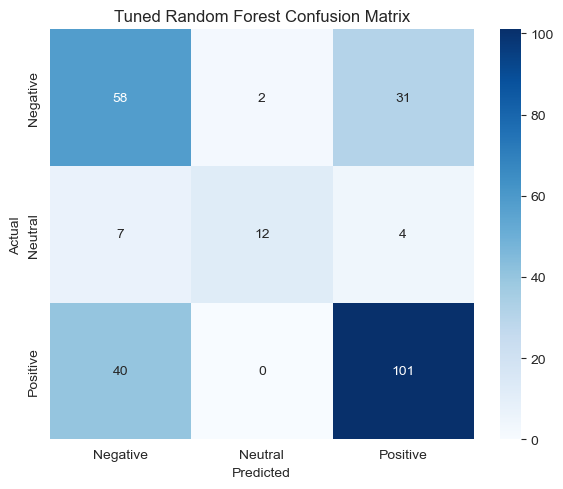

In [125]:
labels = [0, 1, 2]
label_names = ['Negative', 'Neutral', 'Positive']

# Create confusion matrix
cm = confusion_matrix(y_test_numeric, y_pred_numeric_rf_tuned, labels=labels)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names,
            yticklabels=label_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()

In [126]:
# Generate classification report as dictionary
report = classification_report(y_test, y_pred_rf_tuned, target_names=label_names, output_dict=True)

# Convert to DataFrame for clean display
report_df = pd.DataFrame(report).transpose().round(2)

print("Classification Report:\n")
print(report_df)

Classification Report:

              precision  recall  f1-score  support
Negative           0.55    0.64      0.59    91.00
Neutral            0.86    0.52      0.65    23.00
Positive           0.74    0.72      0.73   141.00
accuracy           0.67    0.67      0.67     0.67
macro avg          0.72    0.63      0.66   255.00
weighted avg       0.69    0.67      0.67   255.00


In [128]:
import joblib

# Save model
joblib.dump(rf_model, 'rf_model.pkl')

# Save vectorizer
joblib.dump(tfidf, 'tfidf.pkl')


['tfidf.pkl']

In [129]:
# app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your pre-trained model and vectorizer
model = joblib.load("rf_model.pkl")  # or whatever model you saved
vectorizer = joblib.load("tfidf.pkl")  # the one used for training

# Title
st.title("Starbucks Review Sentiment Classifier")

# Input from user
review = st.text_area("Enter a review to classify sentiment:")

if st.button("Predict"):
    if review:
        # Preprocess and vectorize
        review_transformed = vectorizer.transform([review])
        
        # Predict
        pred = model.predict(review_transformed)[0]
        label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
        sentiment = label_map.get(pred, "Unknown")

        st.subheader("Predicted Sentiment:")
        st.success(sentiment)
    else:
        st.warning("Please enter a review.")


2025-04-20 23:39:01.149 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-20 23:39:01.224 
  command:

    streamlit run C:\Users\Farishtey\anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-20 23:39:01.225 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-20 23:39:01.225 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-20 23:39:01.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-20 23:39:01.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-20 23:39:01.228 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-20 23:39:01.230 Sessio

In [130]:
import os
os.getcwd()


'C:\\Users\\Farishtey\\Health Analytics'

In [131]:
streamlit run app.py

SyntaxError: invalid syntax (3737097518.py, line 1)

In [132]:
# Open or create a new .txt file in write mode
with open("app.py", "w") as file:
    code = '''
import streamlit as st
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your pre-trained model and vectorizer
model = joblib.load("rf_model.pkl")  # or whatever model you saved
vectorizer = joblib.load("tfidf.pkl")  # the one used for training

# Title
st.title("Starbucks Review Sentiment Classifier")

# Input from user
review = st.text_area("Enter a review to classify sentiment:")

if st.button("Predict"):
    if review:
        # Preprocess and vectorize
        review_transformed = vectorizer.transform([review])
        
        # Predict
        pred = model.predict(review_transformed)[0]
        label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
        sentiment = label_map.get(pred, "Unknown")

        st.subheader("Predicted Sentiment:")
        st.success(sentiment)
    else:
        st.warning("Please enter a review.")
'''
    # Write the code to the file
    file.write(code)
    print("app.py file has been created!")


app.py file has been created!
